In [92]:
import numpy as np
import yfinance as yf
import pandas as pd
import ta
import matplotlib.pyplot as plt

In [93]:
df = yf.download('ZM', start=2023-1-1)

[*********************100%***********************]  1 of 1 completed


In [94]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-04-18,65.000000,66.000000,60.320999,62.000000,62.000000,25764700
2019-04-22,61.000000,68.900002,59.939999,65.699997,65.699997,9949700
2019-04-23,66.870003,74.168999,65.550003,69.000000,69.000000,6786500
2019-04-24,71.400002,71.500000,63.160000,63.200001,63.200001,4973500
2019-04-25,64.739998,66.849998,62.599998,65.000000,65.000000,3863300
...,...,...,...,...,...,...
2023-06-21,70.510002,71.000000,66.849998,66.930000,66.930000,4120000
2023-06-22,66.589996,67.480003,65.610001,67.449997,67.449997,2319700
2023-06-23,66.480003,67.485001,65.760002,66.620003,66.620003,5295000


In [95]:
df.std

<bound method NDFrame._add_numeric_operations.<locals>.std of                  Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2019-04-18  65.000000  66.000000  60.320999  62.000000  62.000000  25764700
2019-04-22  61.000000  68.900002  59.939999  65.699997  65.699997   9949700
2019-04-23  66.870003  74.168999  65.550003  69.000000  69.000000   6786500
2019-04-24  71.400002  71.500000  63.160000  63.200001  63.200001   4973500
2019-04-25  64.739998  66.849998  62.599998  65.000000  65.000000   3863300
...               ...        ...        ...        ...        ...       ...
2023-06-21  70.510002  71.000000  66.849998  66.930000  66.930000   4120000
2023-06-22  66.589996  67.480003  65.610001  67.449997  67.449997   2319700
2023-06-23  66.480003  67.485001  65.760002  66.620003  66.620003   5295000
2023-06-26  66.540001  67.860001  66.410004  66.620003  66.620003   2453900
2023-06-27  67.029999  67.

In [96]:
df['ma_20'] = df.Close.rolling(20).mean()
df['vol'] = df.Close.rolling(20).std()
df['upper_bb'] = df.ma_20 + (2 * df.vol)
df['lower_bb'] = df.ma_20 - (2 * df.vol)

In [97]:
df

,Open,High,Low,Close,Adj Close,Volume,ma_20,vol,upper_bb,lower_bb
Date,,,,,,,,,,
2019-04-18,65.000000,66.000000,60.320999,62.000000,62.000000,25764700,NaN,NaN,NaN,NaN
2019-04-22,61.000000,68.900002,59.939999,65.699997,65.699997,9949700,NaN,NaN,NaN,NaN
2019-04-23,66.870003,74.168999,65.550003,69.000000,69.000000,6786500,NaN,NaN,NaN,NaN
2019-04-24,71.400002,71.500000,63.160000,63.200001,63.200001,4973500,NaN,NaN,NaN,NaN
2019-04-25,64.739998,66.849998,62.599998,65.000000,65.000000,3863300,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2023-06-21,70.510002,71.000000,66.849998,66.930000,66.930000,4120000,67.509500,1.968559,71.446617,63.572382
2023-06-22,66.589996,67.480003,65.610001,67.449997,67.449997,2319700,67.599499,1.919609,71.438717,63.760282
2023-06-23,66.480003,67.485001,65.760002,66.620003,66.620003,5295000,67.798999,1.547163,70.893326,64.704673


<Axes: xlabel='Date'>

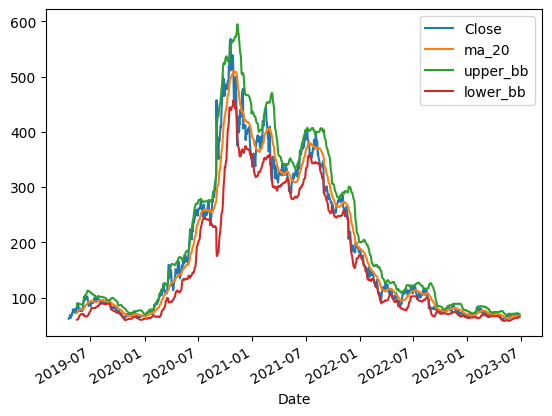

In [98]:
df[['Close','ma_20','upper_bb','lower_bb']].plot()

In [99]:
df['rsi'] = ta.momentum.rsi(df.Close, window=6)

In [100]:
condition = [(df.rsi < 30) & (df.Close < df.lower_bb), (df.rsi > 70) & (df.Close > df.upper_bb)]

In [101]:
choices = ['Buy', 'Sell']

In [102]:
df['signal'] = np.select(condition, choices)

In [103]:
df

,Open,High,Low,Close,Adj Close,Volume,ma_20,vol,upper_bb,lower_bb,rsi,signal
Date,,,,,,,,,,,,
2019-04-18,65.000000,66.000000,60.320999,62.000000,62.000000,25764700,NaN,NaN,NaN,NaN,NaN,0
2019-04-22,61.000000,68.900002,59.939999,65.699997,65.699997,9949700,NaN,NaN,NaN,NaN,NaN,0
2019-04-23,66.870003,74.168999,65.550003,69.000000,69.000000,6786500,NaN,NaN,NaN,NaN,NaN,0
2019-04-24,71.400002,71.500000,63.160000,63.200001,63.200001,4973500,NaN,NaN,NaN,NaN,NaN,0
2019-04-25,64.739998,66.849998,62.599998,65.000000,65.000000,3863300,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-21,70.510002,71.000000,66.849998,66.930000,66.930000,4120000,67.509500,1.968559,71.446617,63.572382,38.199040,0
2023-06-22,66.589996,67.480003,65.610001,67.449997,67.449997,2319700,67.599499,1.919609,71.438717,63.760282,42.627726,0
2023-06-23,66.480003,67.485001,65.760002,66.620003,66.620003,5295000,67.798999,1.547163,70.893326,64.704673,37.482921,0


In [104]:
df.dropna(inplace=True)

In [105]:
df.tail(50)

,Open,High,Low,Close,Adj Close,Volume,ma_20,vol,upper_bb,lower_bb,rsi,signal
Date,,,,,,,,,,,,
2023-04-17,68.000000,69.199997,67.500000,67.620003,67.620003,7925800,70.397000,1.950856,74.298712,66.495288,34.446088,0
2023-04-18,68.300003,68.449997,67.050003,67.269997,67.269997,2548900,70.295499,2.060655,74.416809,66.174190,32.879684,0
2023-04-19,66.500000,68.355003,66.379997,67.750000,67.750000,2903400,70.090499,2.101406,74.293312,65.887687,37.553002,0
2023-04-20,66.760002,67.430000,65.629997,65.699997,65.699997,3399900,69.937999,2.304649,74.547296,65.328702,27.676989,0
2023-04-21,65.500000,65.769997,63.770000,63.980000,63.980000,4619400,69.677499,2.660607,74.998713,64.356285,21.882782,Buy
2023-04-24,63.910000,67.669998,62.610001,65.800003,65.800003,12934600,69.515499,2.796628,75.108755,63.922243,38.287656,0
2023-04-25,65.010002,65.181999,63.020000,63.049999,63.049999,4299200,69.239499,3.145478,75.530456,62.948543,27.729105,0
2023-04-26,64.160004,64.480003,60.910000,61.430000,61.430000,4203300,68.883999,3.597938,76.079876,61.688123,23.205374,Buy
2023-04-27,62.040001,62.404999,61.189999,61.290001,61.290001,3853200,68.418499,3.949340,76.317178,60.519820,22.819313,0


In [106]:
df.signal = df.signal.shift()

In [107]:
for index,rows in df.iterrows():
    print(index)

2019-05-16 00:00:00
2019-05-17 00:00:00
2019-05-20 00:00:00
2019-05-21 00:00:00
2019-05-22 00:00:00
2019-05-23 00:00:00
2019-05-24 00:00:00
2019-05-28 00:00:00
2019-05-29 00:00:00
2019-05-30 00:00:00
2019-05-31 00:00:00
2019-06-03 00:00:00
2019-06-04 00:00:00
2019-06-05 00:00:00
2019-06-06 00:00:00
2019-06-07 00:00:00
2019-06-10 00:00:00
2019-06-11 00:00:00
2019-06-12 00:00:00
2019-06-13 00:00:00
2019-06-14 00:00:00
2019-06-17 00:00:00
2019-06-18 00:00:00
2019-06-19 00:00:00
2019-06-20 00:00:00
2019-06-21 00:00:00
2019-06-24 00:00:00
2019-06-25 00:00:00
2019-06-26 00:00:00
2019-06-27 00:00:00
2019-06-28 00:00:00
2019-07-01 00:00:00
2019-07-02 00:00:00
2019-07-03 00:00:00
2019-07-05 00:00:00
2019-07-08 00:00:00
2019-07-09 00:00:00
2019-07-10 00:00:00
2019-07-11 00:00:00
2019-07-12 00:00:00
2019-07-15 00:00:00
2019-07-16 00:00:00
2019-07-17 00:00:00
2019-07-18 00:00:00
2019-07-19 00:00:00
2019-07-22 00:00:00
2019-07-23 00:00:00
2019-07-24 00:00:00
2019-07-25 00:00:00
2019-07-26 00:00:00


In [108]:
for index,rows in df.iterrows():
    print(rows)

Open         80.120003
High         87.550003
Low              79.25
Close        83.400002
Adj Close    83.400002
Volume         4580700
ma_20          72.6065
vol           6.128922
upper_bb     84.864345
lower_bb     60.348655
rsi          68.922618
signal            None
Name: 2019-05-16 00:00:00, dtype: object
Open             82.25
High         90.279999
Low          81.879997
Close        89.980003
Adj Close    89.980003
Volume         3442500
ma_20          74.0055
vol           6.743054
upper_bb     87.491609
lower_bb     60.519392
rsi          76.990628
signal               0
Name: 2019-05-17 00:00:00, dtype: object
Open         90.099998
High         91.459999
Low          83.269997
Close        84.669998
Adj Close    84.669998
Volume         3666800
ma_20           74.954
vol           6.846682
upper_bb     88.647363
lower_bb     61.260637
rsi          61.523399
signal            Sell
Name: 2019-05-20 00:00:00, dtype: object
Open         86.629997
High         89.699997
Low

In [109]:
df['shifted_Close'] = df.Close.shift()

In [110]:
position = False
buydates,selldates = [],[]
buyprices, sellprices = [],[]

for index,row in df.iterrows():
    if not position and row['signal'] == 'Buy':
        buydates.append(index)
        buyprices.append(row.Open)
        position = True
    
    # if position and row['signal'] == 'Sell':
    #     selldates.append(index)
    #     sellprices.append(row.Open)
    #     position = False
    
    #Lets append the above function
    if position:
        if row['signal'] == 'Sell' or row.shifted_Close<0.90 * buyprices[-1]: # 0.90 matlab 10% stop loss le rhe hai 
            selldates.append(index)
            sellprices.append(row.Open)
            position = False

In [111]:
sellprices

[76.12999725341797,
 73.80000305175781,
 71.80999755859375,
 291.0,
 350.6600036621094,
 420.739990234375,
 331.95001220703125,
 361.8699951171875,
 395.7330017089844,
 262.32000732421875,
 203.89700317382812,
 235.6999969482422,
 143.60000610351562,
 114.0999984741211,
 122.4800033569336,
 81.63999938964844,
 74.16000366210938,
 82.3499984741211,
 68.44999694824219,
 73.08999633789062,
 67.83000183105469]

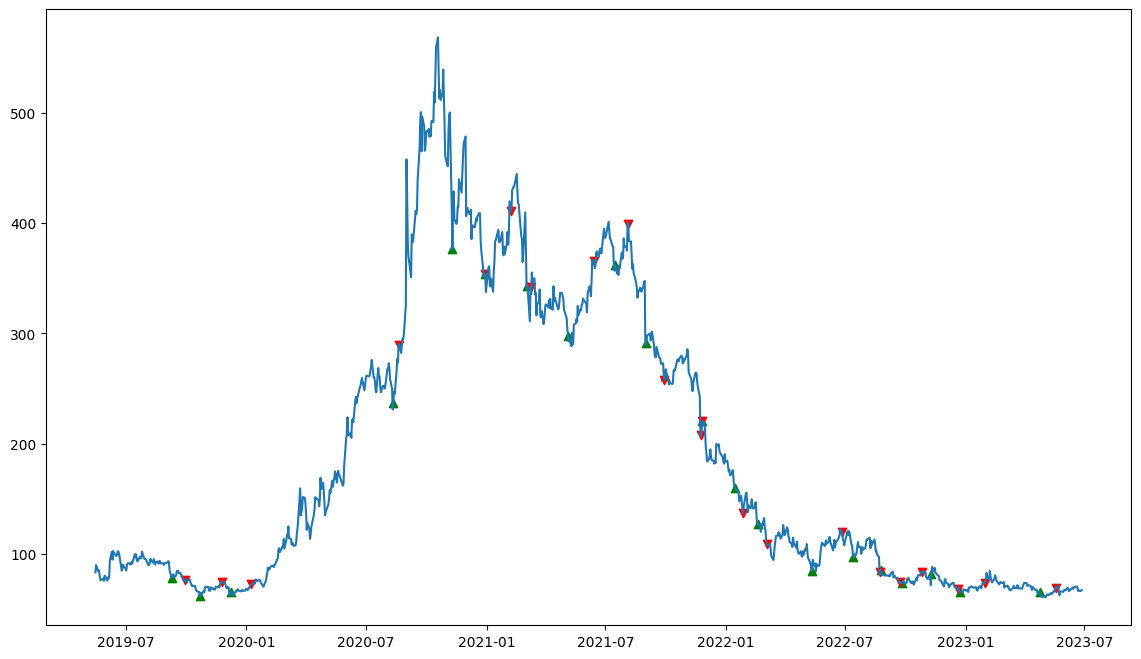

In [112]:
plt.figure(figsize=(14,8))
plt.plot(df.Close)
plt.scatter(df.loc[buydates].index, df.loc[buydates].Close, marker='^', c='g')
plt.scatter(df.loc[selldates].index, df.loc[selldates].Close, marker='v', c='r')

In [113]:
[(sell - buy) / buy for sell,buy in zip(sellprices,buyprices)]

[-0.11218662095139395,
 0.20332628156532828,
 0.15098570702195344,
 0.25269046998317723,
 -0.1499233812764155,
 0.17387415454468128,
 -0.045572099316381655,
 0.18053696720801443,
 0.09965545079722055,
 -0.10425131686186558,
 -0.2078193211167532,
 0.0,
 -0.11039519432269437,
 -0.12318455242606881,
 0.5096759214024695,
 -0.19447458688916947,
 -0.11291860029081136,
 0.10064152379056711,
 -0.10953565106662147,
 0.11400694494672681,
 0.06133628529184404]

In [114]:
pd.Series([(sell - buy) / buy for sell,buy in zip(sellprices,buyprices)])

0    -0.112187
1     0.203326
2     0.150986
3     0.252690
4    -0.149923
5     0.173874
6    -0.045572
7     0.180537
8     0.099655
9    -0.104251
10   -0.207819
11    0.000000
12   -0.110395
13   -0.123185
14    0.509676
15   -0.194475
16   -0.112919
17    0.100642
18   -0.109536
19    0.114007
20    0.061336
dtype: float64

In [115]:
(pd.Series([(sell - buy) / buy for sell,buy in zip(sellprices,buyprices)]) + 1).prod() - 1

0.3177204248908152